# DATA ANALYSIS AND PARSING
# VISUALIZATION ACCORDING TO MONTHS


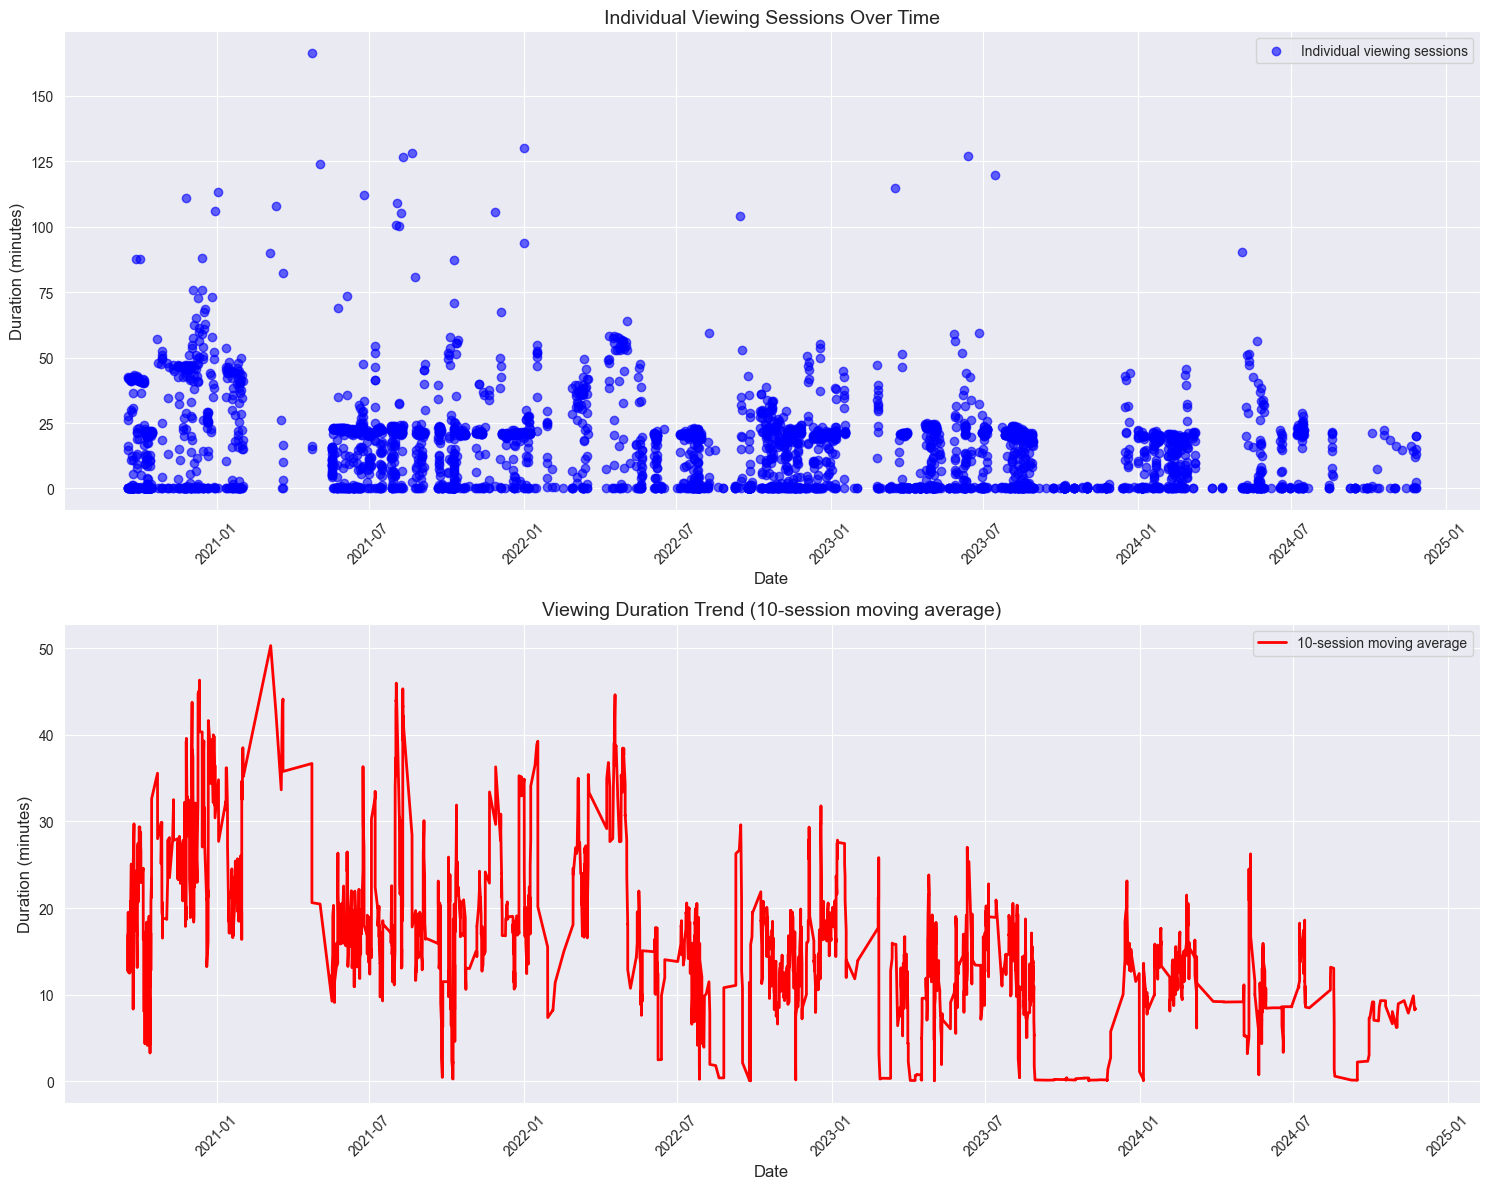


Viewing Statistics:
Total number of views: 4072
Average viewing duration: 15.48 minutes
Longest viewing session: 166.33 minutes
Shortest viewing session: 0.02 minutes


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the CSV data with the correct column names
data = pd.read_csv('myData.csv', names=[
    'Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title', 
    'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'
])

# Convert Duration to timedelta
def convert_duration(duration_str):
    try:
        if pd.isna(duration_str):
            return pd.NaT
        parts = duration_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2])
        return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)
    except:
        return pd.NaT

# Process the data - first convert Start Time, then Duration
data = data.iloc[1:]  # Skip the header row
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['Duration'] = data['Duration'].apply(convert_duration)

# Filter for Mehmet Fatih's entries and remove NaN values
mehmet_data = data[data['Profile Name'] == 'Mehmet Fatih'].copy()
mehmet_data = mehmet_data.dropna(subset=['Duration', 'Start Time'])

# Convert duration to minutes for easier plotting
mehmet_data['Duration_Minutes'] = mehmet_data['Duration'].dt.total_seconds() / 60

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
sns.set_style("darkgrid")

# Plot 1: Scatter plot of viewing sessions
ax1.scatter(mehmet_data['Start Time'], mehmet_data['Duration_Minutes'], 
           alpha=0.6, color='blue', label='Individual viewing sessions')
ax1.set_title("Individual Viewing Sessions Over Time", fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Duration (minutes)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot 2: Moving average trend
ax2.plot(mehmet_data['Start Time'], mehmet_data['Duration_Minutes'].rolling(10).mean(), 
         color='red', linewidth=2, label='10-session moving average')
ax2.set_title("Viewing Duration Trend (10-session moving average)", fontsize=14)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Duration (minutes)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plots
plt.show()

# Print some statistics
print("\nViewing Statistics:")
print(f"Total number of views: {len(mehmet_data)}")
print(f"Average viewing duration: {mehmet_data['Duration_Minutes'].mean():.2f} minutes")
print(f"Longest viewing session: {mehmet_data['Duration_Minutes'].max():.2f} minutes")
print(f"Shortest viewing session: {mehmet_data['Duration_Minutes'].min():.2f} minutes")

#  VISUALIZATION ACCORDING TO YEARS


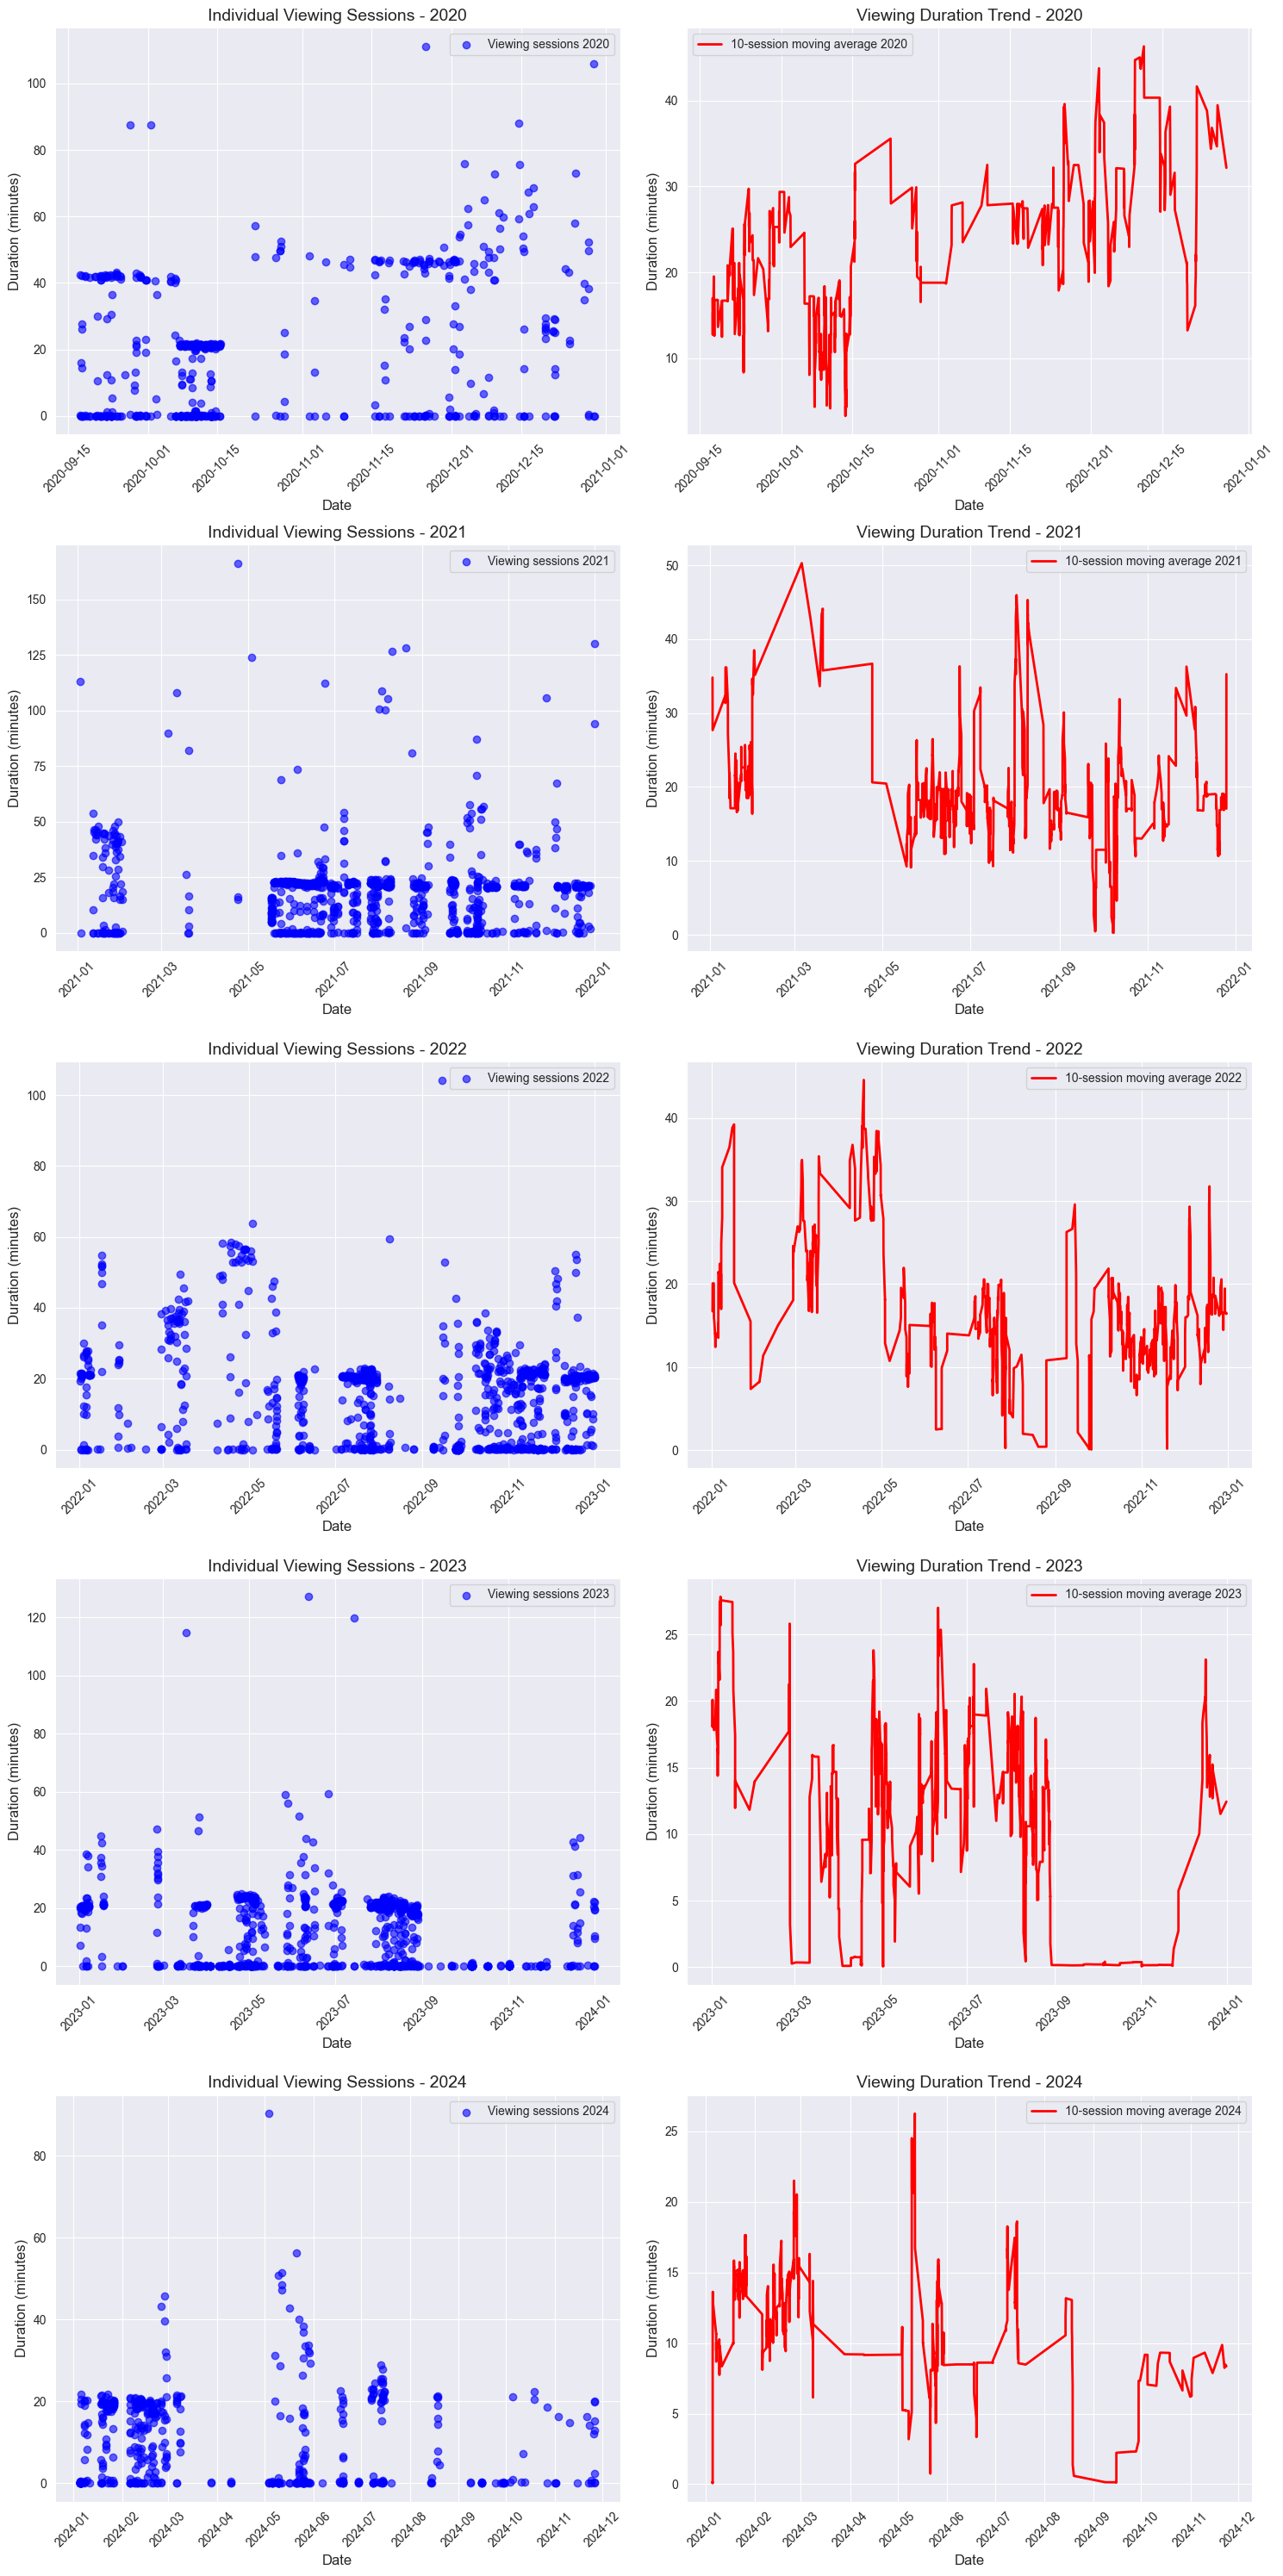


Viewing Statistics by Year:

Year 2020:
Total number of views: 550
Average viewing duration: 19.97 minutes
Longest viewing session: 111.15 minutes
Shortest viewing session: 0.02 minutes

Year 2021:
Total number of views: 1067
Average viewing duration: 18.56 minutes
Longest viewing session: 166.33 minutes
Shortest viewing session: 0.02 minutes

Year 2022:
Total number of views: 1045
Average viewing duration: 15.35 minutes
Longest viewing session: 104.25 minutes
Shortest viewing session: 0.02 minutes

Year 2023:
Total number of views: 912
Average viewing duration: 11.87 minutes
Longest viewing session: 127.08 minutes
Shortest viewing session: 0.02 minutes

Year 2024:
Total number of views: 498
Average viewing duration: 10.83 minutes
Longest viewing session: 90.27 minutes
Shortest viewing session: 0.02 minutes


In [11]:

# After processing mehmet_data, add year-by-year analysis
mehmet_data['Year'] = mehmet_data['Start Time'].dt.year

# Create figure with 3 rows of subplots
fig, axes = plt.subplots(len(mehmet_data['Year'].unique()), 2, figsize=(15, 6*len(mehmet_data['Year'].unique())))
sns.set_style("darkgrid")

# Plot data for each year
for idx, year in enumerate(sorted(mehmet_data['Year'].unique())):
    year_data = mehmet_data[mehmet_data['Year'] == year]
    
    # Scatter plot for the year
    axes[idx, 0].scatter(year_data['Start Time'], year_data['Duration_Minutes'], 
                        alpha=0.6, color='blue', label=f'Viewing sessions {year}')
    axes[idx, 0].set_title(f"Individual Viewing Sessions - {year}", fontsize=14)
    axes[idx, 0].set_xlabel('Date', fontsize=12)
    axes[idx, 0].set_ylabel('Duration (minutes)', fontsize=12)
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].legend()

    # Moving average trend for the year
    axes[idx, 1].plot(year_data['Start Time'], 
                     year_data['Duration_Minutes'].rolling(10).mean(), 
                     color='red', linewidth=2, 
                     label=f'10-session moving average {year}')
    axes[idx, 1].set_title(f"Viewing Duration Trend - {year}", fontsize=14)
    axes[idx, 1].set_xlabel('Date', fontsize=12)
    axes[idx, 1].set_ylabel('Duration (minutes)', fontsize=12)
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plots
plt.show()

# Print statistics by year
print("\nViewing Statistics by Year:")
for year in sorted(mehmet_data['Year'].unique()):
    year_data = mehmet_data[mehmet_data['Year'] == year]
    print(f"\nYear {year}:")
    print(f"Total number of views: {len(year_data)}")
    print(f"Average viewing duration: {year_data['Duration_Minutes'].mean():.2f} minutes")
    print(f"Longest viewing session: {year_data['Duration_Minutes'].max():.2f} minutes")
    print(f"Shortest viewing session: {year_data['Duration_Minutes'].min():.2f} minutes")

# Different visualization for the data 
It is important to see different visualization for the data to understand the correlation between the duration and the time.


Correlation Analysis - Years vs. Viewing Duration:

Pearson Correlation:
Correlation coefficient: -0.2057
P-value: 3.7092e-40

Spearman Correlation:
Correlation coefficient: -0.1785
P-value: 1.6185e-30


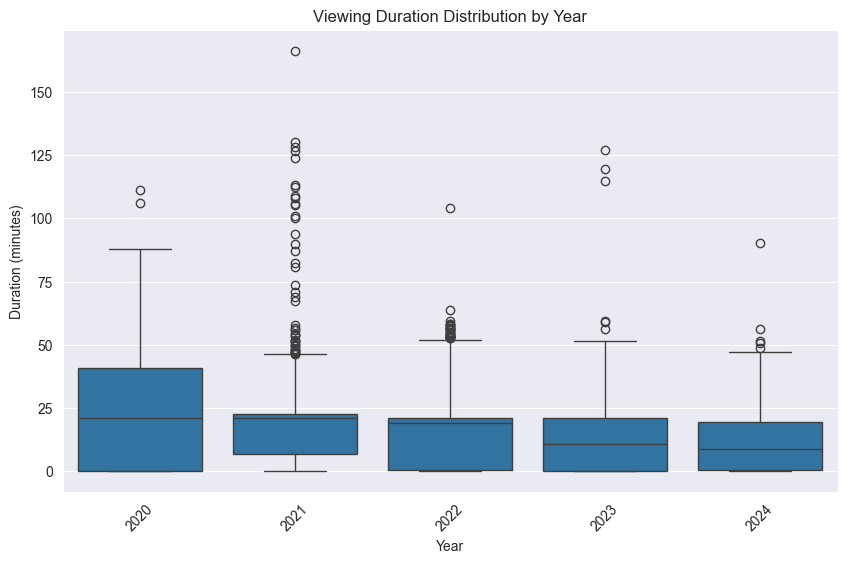

In [12]:
# After the previous analysis, add correlation analysis
import scipy.stats as stats

# Convert years to numeric format for correlation analysis
mehmet_data['Year_Numeric'] = mehmet_data['Year']

# Calculate Pearson correlation
pearson_corr, pearson_p = stats.pearsonr(mehmet_data['Year_Numeric'], 
                                        mehmet_data['Duration_Minutes'])

# Calculate Spearman correlation (non-parametric)
spearman_corr, spearman_p = stats.spearmanr(mehmet_data['Year_Numeric'], 
                                           mehmet_data['Duration_Minutes'])

print("\nCorrelation Analysis - Years vs. Viewing Duration:")
print("\nPearson Correlation:")
print(f"Correlation coefficient: {pearson_corr:.4f}")
print(f"P-value: {pearson_p:.4e}")
print("\nSpearman Correlation:")
print(f"Correlation coefficient: {spearman_corr:.4f}")
print(f"P-value: {spearman_p:.4e}")

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Duration_Minutes', data=mehmet_data)
plt.title('Viewing Duration Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

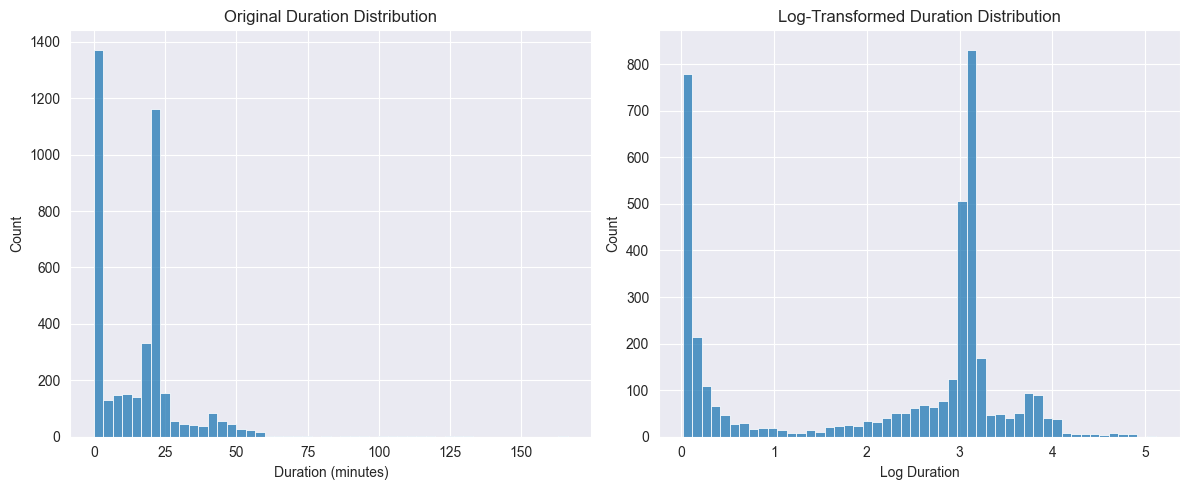


Original Duration Statistics:
count    4072.000000
mean       15.483084
std        15.690820
min         0.016667
25%         0.266667
50%        18.183333
75%        21.833333
max       166.333333
Name: Duration_Minutes, dtype: float64

Log-Transformed Duration Statistics:
count    4072.000000
mean        2.101035
std         1.416611
min         0.016529
25%         0.236389
50%         2.954042
75%         3.128221
max         5.119988
Name: Duration_Log, dtype: float64

Skewness comparison:
Original data skewness: 2.0195
Log-transformed data skewness: -0.4784


In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform log transformation (adding 1 to handle zeros)
mehmet_data['Duration_Log'] = np.log1p(mehmet_data['Duration_Minutes'])

# Create visualization of original vs transformed data
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(mehmet_data['Duration_Minutes'], bins=50)
plt.title('Original Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(mehmet_data['Duration_Log'], bins=50)
plt.title('Log-Transformed Duration Distribution')
plt.xlabel('Log Duration')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOriginal Duration Statistics:")
print(mehmet_data['Duration_Minutes'].describe())

print("\nLog-Transformed Duration Statistics:")
print(mehmet_data['Duration_Log'].describe())

# Calculate skewness
original_skew = mehmet_data['Duration_Minutes'].skew()
transformed_skew = mehmet_data['Duration_Log'].skew()

print(f"\nSkewness comparison:")
print(f"Original data skewness: {original_skew:.4f}")
print(f"Log-transformed data skewness: {transformed_skew:.4f}")

# HYPOTHESIS TESTING
 My main hypothesis is that the average viewing duration of mine is getting shorter over time.
 I will use the data to test this data for hypothesis testing.
 My first approach will be to use an ANOVA test to see if there is a significant difference between the years.

In [14]:
import numpy as np
from scipy.stats import f

# Create lists to store durations for each year
year_groups = []
year_labels = []

for year in sorted(mehmet_data['Year'].unique()):
    year_data = mehmet_data[mehmet_data['Year'] == year]
    year_groups.append(year_data['Duration_Minutes'].values)
    year_labels.append(str(year))

# Perform one-way ANOVA using numpy
def f_oneway(*args):
    # Calculate group means
    means = [np.mean(arg) for arg in args]
    
    # Calculate overall mean
    overall_mean = np.mean([item for sublist in args for item in sublist])
    
    # Calculate between-group sum of squares
    n = sum(len(arg) for arg in args)
    between_ss = sum(len(arg) * (mean - overall_mean) ** 2 for arg, mean in zip(args, means))
    between_df = len(args) - 1
    
    # Calculate within-group sum of squares
    within_ss = sum(sum((x - mean) ** 2 for x in arg) for arg, mean in zip(args, means))
    within_df = n - len(args)
    
    # Calculate F-statistic
    f_stat = (between_ss / between_df) / (within_ss / within_df)
    
    # Calculate p-value
    p_value = 1 - f.cdf(f_stat, between_df, within_df)
    
    return f_stat, p_value, between_df, within_df

# Calculate F-statistic and p-value
f_statistic, p_value, df_between, df_within = f_oneway(*year_groups)

print("\nOne-way ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4e}")
print(f"Degrees of freedom (between, within): ({df_between}, {df_within})")

# Interpret results
alpha = 0.05
print("\nHypothesis Test Results:")
print(f"Null Hypothesis: All years have the same mean viewing duration")
print(f"Alternative Hypothesis: At least one year has a different mean viewing duration")
print(f"Significance level (α): {alpha}")
if p_value < alpha:
    print(f"Decision: Reject the null hypothesis (p-value = {p_value:.4e} < {alpha})")
    print("Conclusion: There are significant differences in viewing durations between years")
else:
    print(f"Decision: Fail to reject the null hypothesis (p-value = {p_value:.4e} >= {alpha})")
    print("Conclusion: There is not enough evidence to conclude differences in viewing durations between years")

# Add descriptive statistics
print("\nDescriptive Statistics by Year:")
for year, group in zip(year_labels, year_groups):
    print(f"\nYear {year}:")
    print(f"Mean: {np.mean(group):.2f} minutes")
    print(f"Median: {np.median(group):.2f} minutes")
    print(f"Standard Deviation: {np.std(group):.2f} minutes")


One-way ANOVA Test Results:
F-statistic: 46.5899
p-value: 1.1102e-16
Degrees of freedom (between, within): (4, 4067)

Hypothesis Test Results:
Null Hypothesis: All years have the same mean viewing duration
Alternative Hypothesis: At least one year has a different mean viewing duration
Significance level (α): 0.05
Decision: Reject the null hypothesis (p-value = 1.1102e-16 < 0.05)
Conclusion: There are significant differences in viewing durations between years

Descriptive Statistics by Year:

Year 2020:
Mean: 19.97 minutes
Median: 20.95 minutes
Standard Deviation: 20.55 minutes

Year 2021:
Mean: 18.56 minutes
Median: 21.02 minutes
Standard Deviation: 17.12 minutes

Year 2022:
Mean: 15.35 minutes
Median: 19.05 minutes
Standard Deviation: 13.61 minutes

Year 2023:
Mean: 11.87 minutes
Median: 10.76 minutes
Standard Deviation: 13.07 minutes

Year 2024:
Mean: 10.83 minutes
Median: 8.54 minutes
Standard Deviation: 11.33 minutes


# Machine Learning
Now I Will train a model to predict the viewing duration of the next session. I choose KNN model for this task. Since it is a rather simple model.


K-Nearest Neighbors Model Results:
----------------------------------------
Root Mean Square Error: 16.95 minutes
R² Score: -0.2029


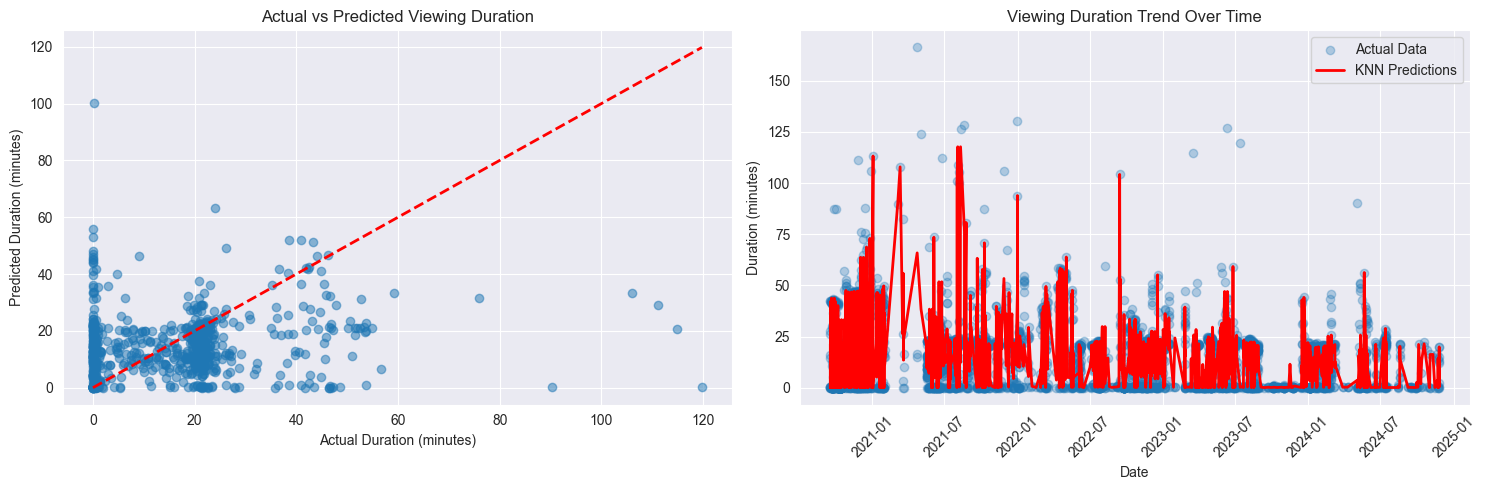


Model Interpretation:
----------------------------------------
The model shows a weak predictive power
About -20.3% of the variation in viewing duration can be explained by the model

Actual Average Duration by Year:
2020: 19.97 minutes (n=550.0 views)
2021: 18.56 minutes (n=1067.0 views)
2022: 15.35 minutes (n=1045.0 views)
2023: 11.87 minutes (n=912.0 views)
2024: 10.83 minutes (n=498.0 views)

Model Performance with Different k Values:
k=3: R²=-0.2513
k=5: R²=-0.2029
k=7: R²=-0.1955
k=9: R²=-0.1930
k=11: R²=-0.1879


In [15]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
mehmet_data['Year'] = mehmet_data['Start Time'].dt.year
mehmet_data['Month'] = mehmet_data['Start Time'].dt.month
mehmet_data['DayOfWeek'] = mehmet_data['Start Time'].dt.dayofweek
mehmet_data['Hour'] = mehmet_data['Start Time'].dt.hour

# Create feature matrix X and target variable y
X = mehmet_data[['Year', 'Month', 'DayOfWeek', 'Hour']]
y = mehmet_data['Duration_Minutes']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn_model = KNeighborsRegressor(
    n_neighbors=5,    # Number of neighbors to use
    weights='distance',  # Weight points by inverse of their distance
    metric='euclidean'  # Distance metric to use
)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model performance
print("\nK-Nearest Neighbors Model Results:")
print("-" * 40)
print(f"Root Mean Square Error: {rmse:.2f} minutes")
print(f"R² Score: {r2:.4f}")

# Visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Actual vs Predicted Viewing Duration')

# Plot 2: Predictions over time
plt.subplot(1, 2, 2)
plt.scatter(mehmet_data['Start Time'], mehmet_data['Duration_Minutes'], 
           alpha=0.3, label='Actual Data')

# Add trend line using KNN predictions
X_full_scaled = scaler.transform(X)
y_trend = knn_model.predict(X_full_scaled)
plt.plot(mehmet_data['Start Time'], y_trend, 'r-', 
         label='KNN Predictions', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Duration (minutes)')
plt.title('Viewing Duration Trend Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print interpretation
print("\nModel Interpretation:")
print("-" * 40)
if r2 < 0.3:
    strength = "weak"
elif r2 < 0.7:
    strength = "moderate"
else:
    strength = "strong"

print(f"The model shows a {strength} predictive power")
print(f"About {r2*100:.1f}% of the variation in viewing duration can be explained by the model")

# Calculate average predictions by year
yearly_avg = mehmet_data.groupby('Year')['Duration_Minutes'].agg(['mean', 'count'])
print("\nActual Average Duration by Year:")
for year, stats in yearly_avg.iterrows():
    print(f"{year}: {stats['mean']:.2f} minutes (n={stats['count']} views)")

# Try different k values to find optimal
k_values = [3, 5, 7, 9, 11]
k_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    score = r2_score(y_test, knn.predict(X_test))
    k_results.append({'k': k, 'R²': score})

print("\nModel Performance with Different k Values:")
for result in k_results:
    print(f"k={result['k']}: R²={result['R²']:.4f}")

Since knn model doesn't seem to be a good model for this task, I will try to use a tree based model.



Decision Tree Model Results:
----------------------------------------
Root Mean Square Error: 14.91 minutes
R² Score: 0.0700

Feature Importance:
----------------------------------------
     Feature  Importance
1      Month    0.433004
0       Year    0.311305
3       Hour    0.183918
2  DayOfWeek    0.071773


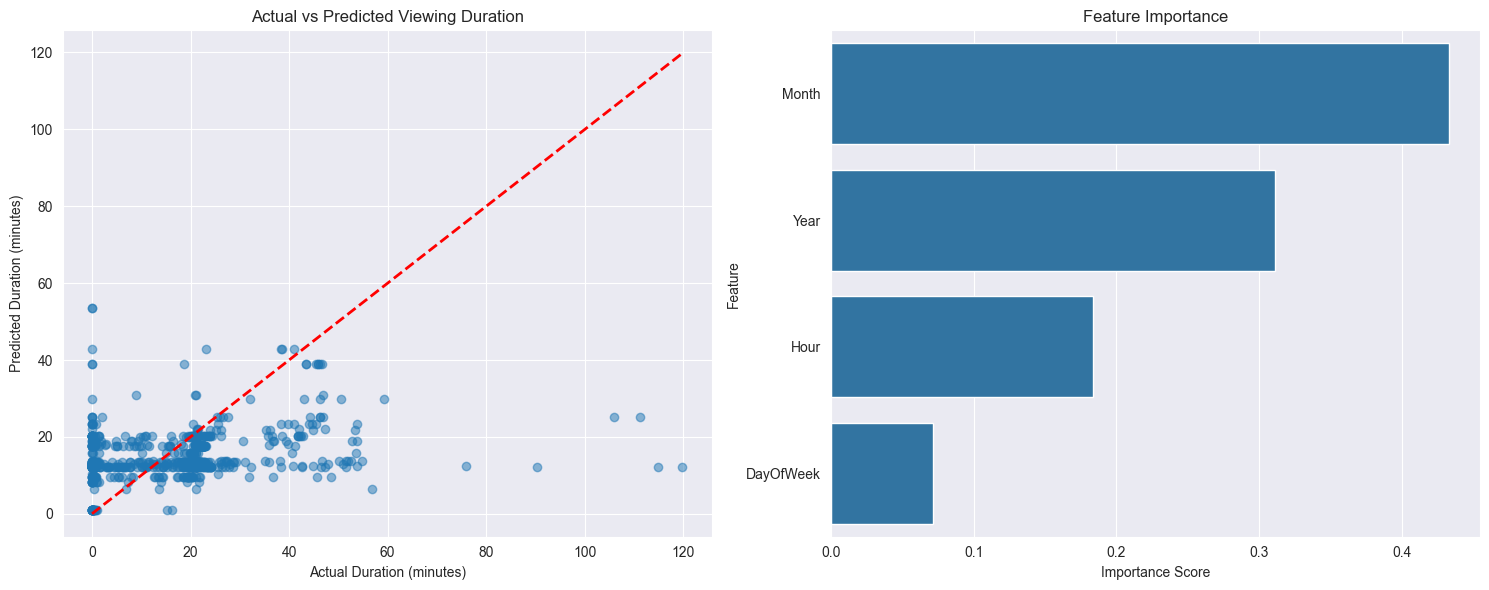

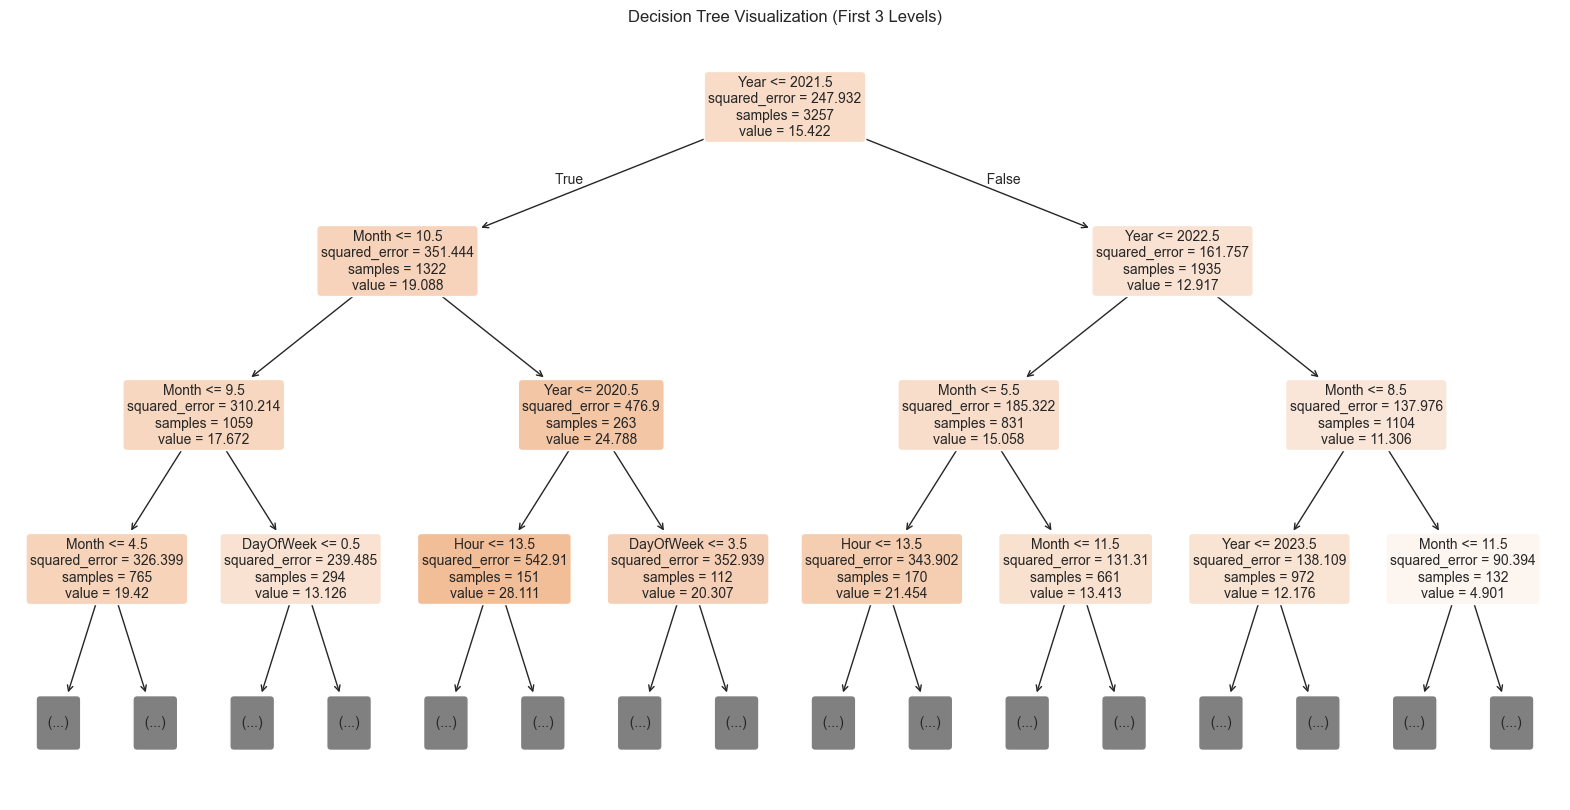


Model Interpretation:
----------------------------------------
The model shows a weak predictive power
About 7.0% of the variation in viewing duration can be explained by the model

Top 3 most important features for predicting viewing duration:
- Month: 43.3% importance
- Year: 31.1% importance
- Hour: 18.4% importance

Average Predicted Duration by Year:
2020: 19.81 minutes
2021: 18.62 minutes
2022: 15.06 minutes
2023: 11.90 minutes
2024: 10.08 minutes


In [16]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
mehmet_data['Year'] = mehmet_data['Start Time'].dt.year
mehmet_data['Month'] = mehmet_data['Start Time'].dt.month
mehmet_data['DayOfWeek'] = mehmet_data['Start Time'].dt.dayofweek
mehmet_data['Hour'] = mehmet_data['Start Time'].dt.hour

# Create feature matrix X and target variable y
X = mehmet_data[['Year', 'Month', 'DayOfWeek', 'Hour']]
y = mehmet_data['Duration_Minutes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(
    max_depth=5,           # Limit tree depth to prevent overfitting
    min_samples_split=20,  # Minimum samples required to split a node
    min_samples_leaf=10,   # Minimum samples required at each leaf node
    random_state=42
)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model performance
print("\nDecision Tree Model Results:")
print("-" * 40)
print(f"Root Mean Square Error: {rmse:.2f} minutes")
print(f"R² Score: {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print("-" * 40)
print(feature_importance)

# Visualizations
plt.figure(figsize=(15, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Actual vs Predicted Viewing Duration')

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

# Visualize the decision tree (limited to max_depth=3 for clarity)
plt.figure(figsize=(20,10))
plot_tree(tree_model, max_depth=3, feature_names=X.columns, 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# Print interpretation
print("\nModel Interpretation:")
print("-" * 40)
if r2 < 0.3:
    strength = "weak"
elif r2 < 0.7:
    strength = "moderate"
else:
    strength = "strong"

print(f"The model shows a {strength} predictive power")
print(f"About {r2*100:.1f}% of the variation in viewing duration can be explained by the model")

# Most important features
print("\nTop 3 most important features for predicting viewing duration:")
for idx, row in feature_importance.head(3).iterrows():
    print(f"- {row['Feature']}: {row['Importance']*100:.1f}% importance")

# Calculate average predictions by year
yearly_predictions = {}
for year in mehmet_data['Year'].unique():
    year_data = mehmet_data[mehmet_data['Year'] == year]
    X_year = year_data[['Year', 'Month', 'DayOfWeek', 'Hour']]
    pred_year = tree_model.predict(X_year)
    yearly_predictions[year] = np.mean(pred_year)

print("\nAverage Predicted Duration by Year:")
for year, pred in sorted(yearly_predictions.items()):
    print(f"{year}: {pred:.2f} minutes")

It works better than the previous model, but it is still not a trustable model for this dataset.